In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df.isna().sum() #checking missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [19]:
df.drop('PassengerId', axis=1, inplace=True, errors='ignore')

In [21]:
df['Age'].median()

27.0

In [23]:
df['Age'].mean()

np.float64(30.272590361445783)

In [24]:
df['Age']=df['Age'].fillna(27.0)

In [26]:
df['Cabin']=df['Cabin'].fillna('unknown')

In [27]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,unknown,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,unknown,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,unknown,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,unknown,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,unknown,S


In [28]:
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,0


In [29]:
df['Fare'].median()

14.4542

In [31]:
df['Fare']=df['Fare'].fillna(14.452)

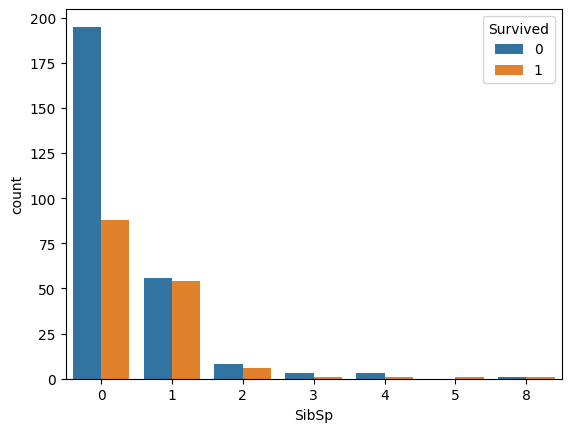

In [32]:
sns.countplot(x='SibSp',data=df,hue='Survived')
plt.show()

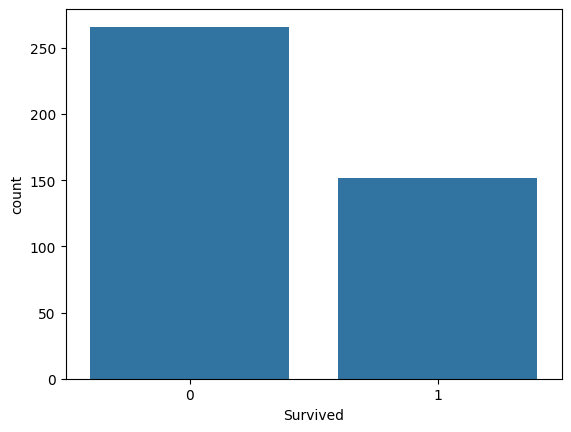

In [33]:
sns.countplot(x='Survived',data=df)
plt.show()

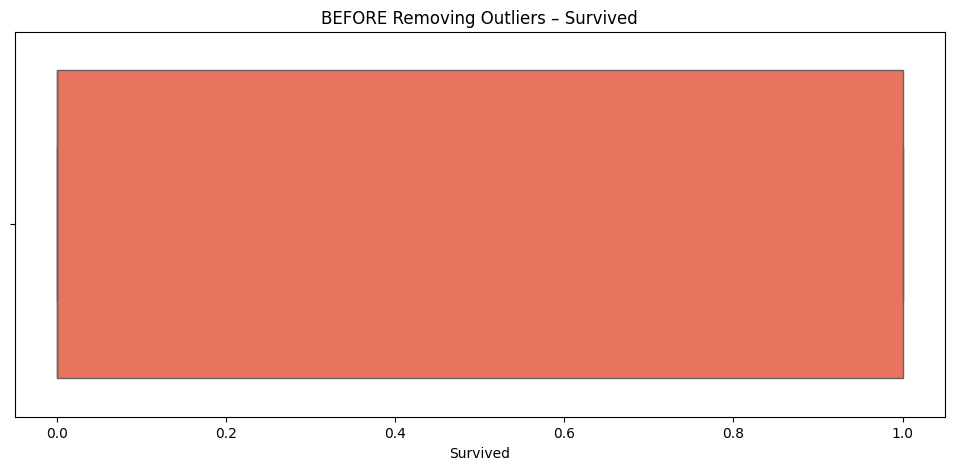

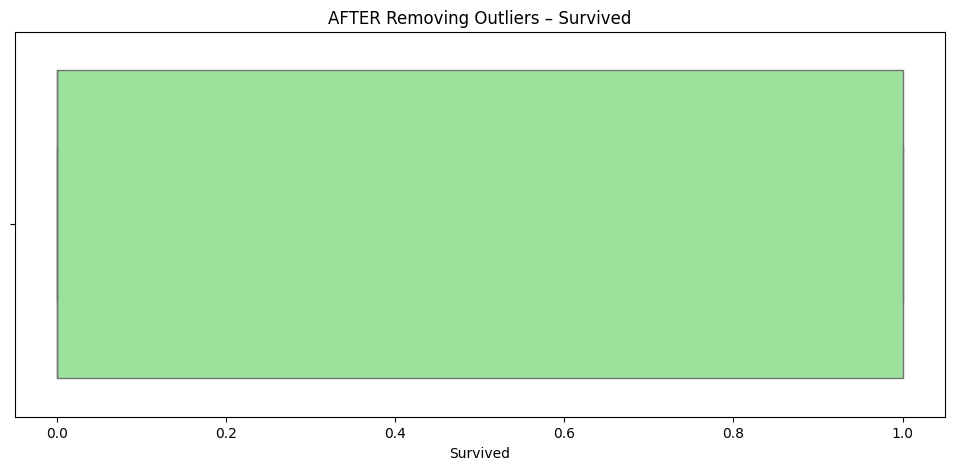

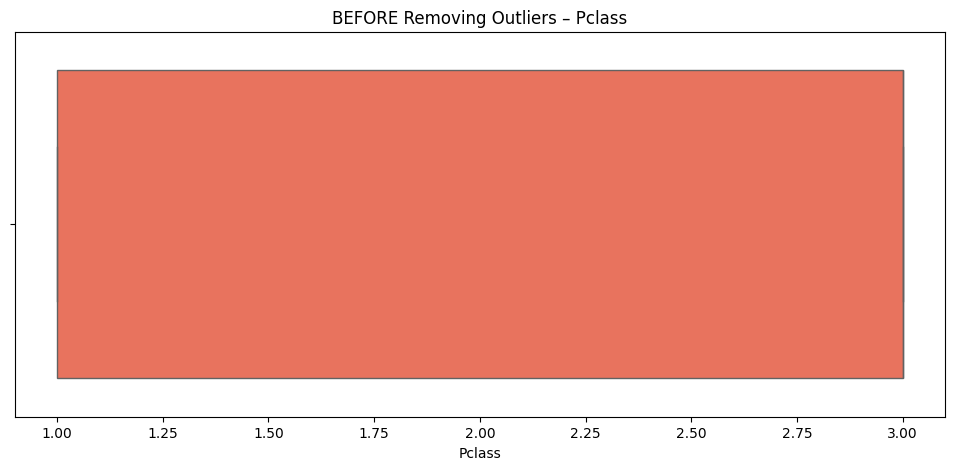

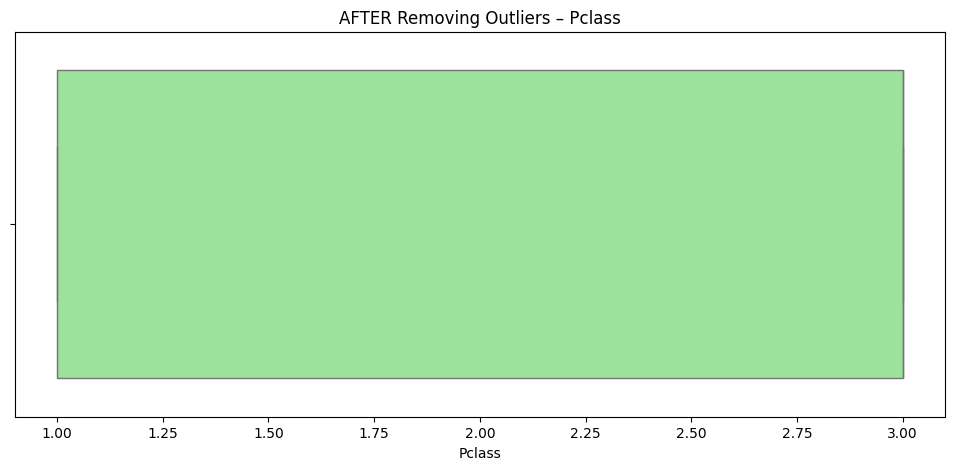

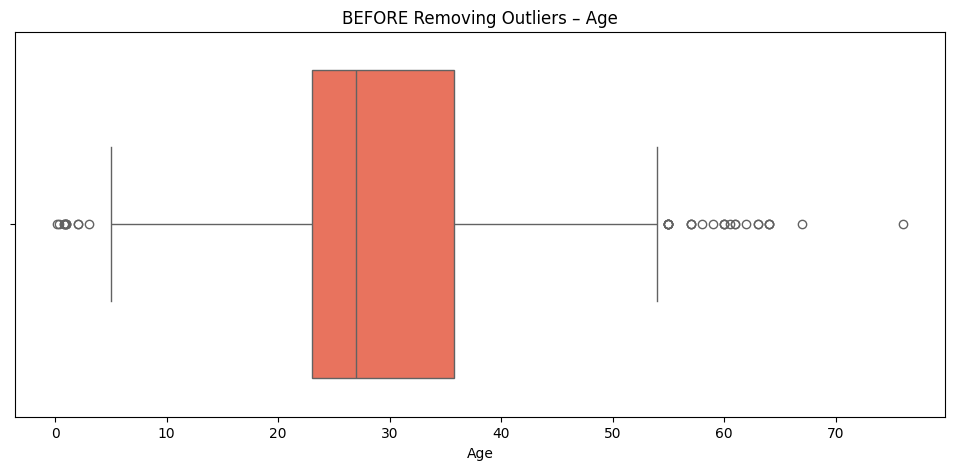

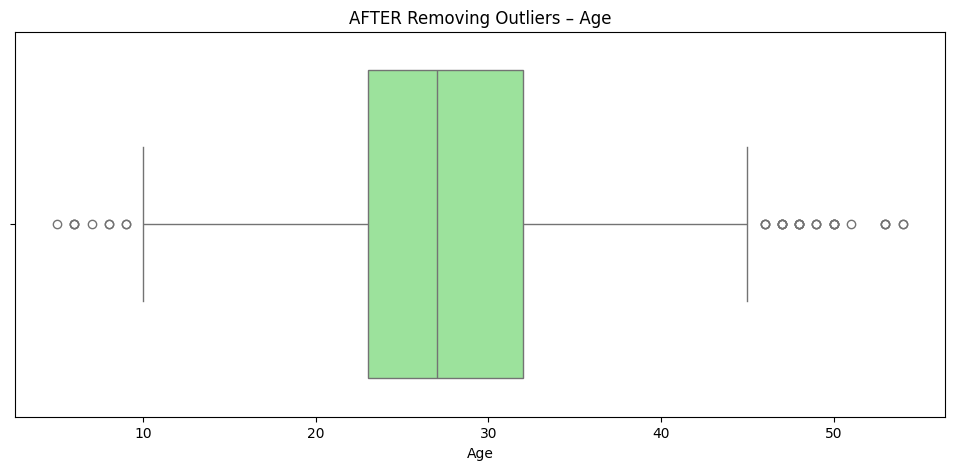

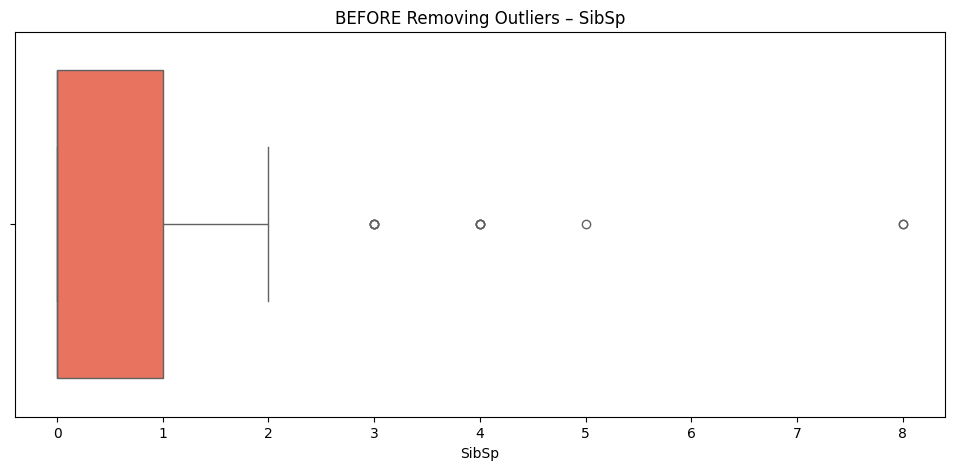

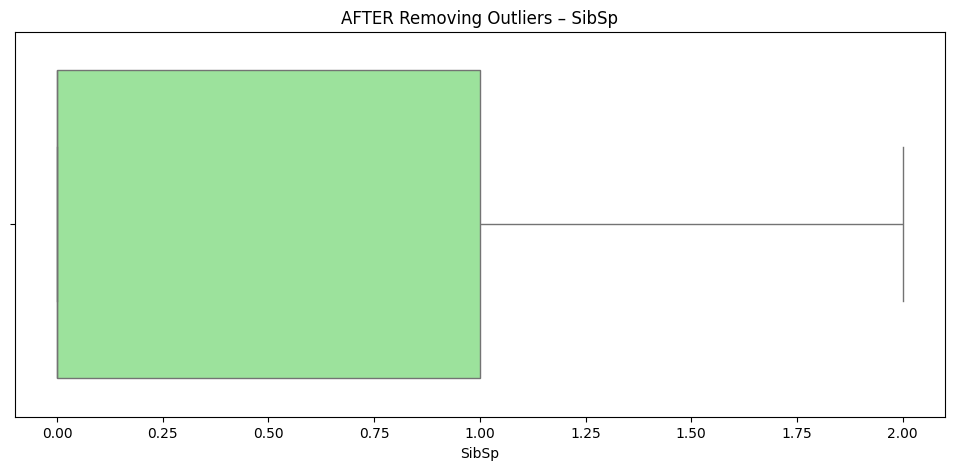

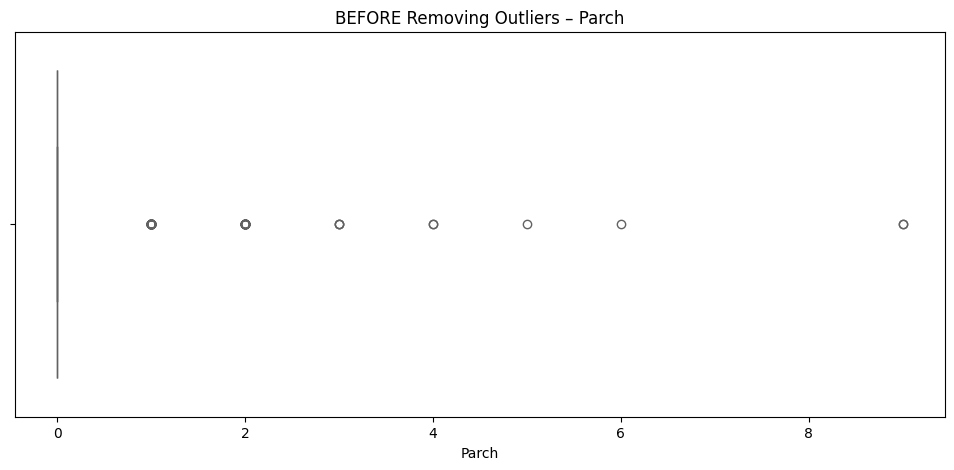

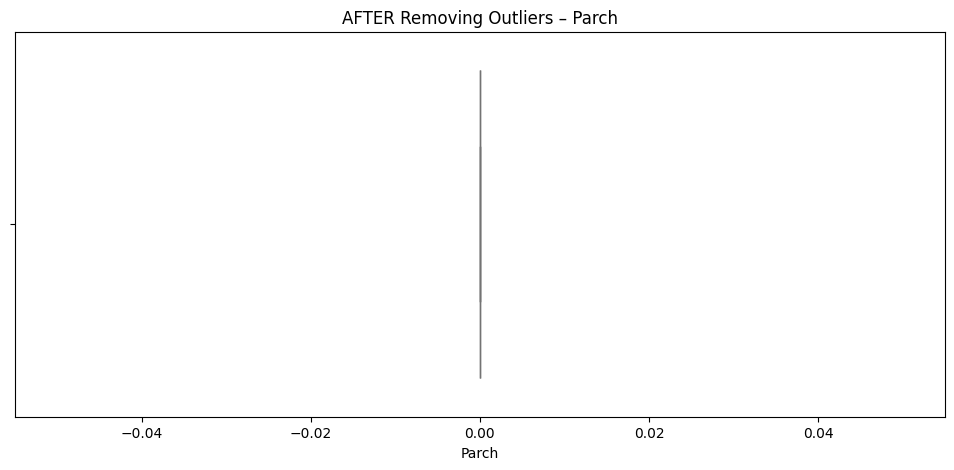

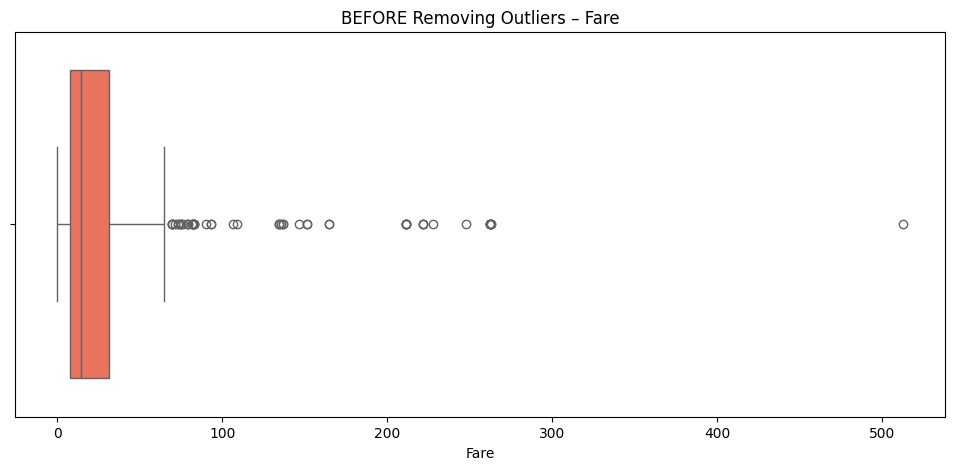

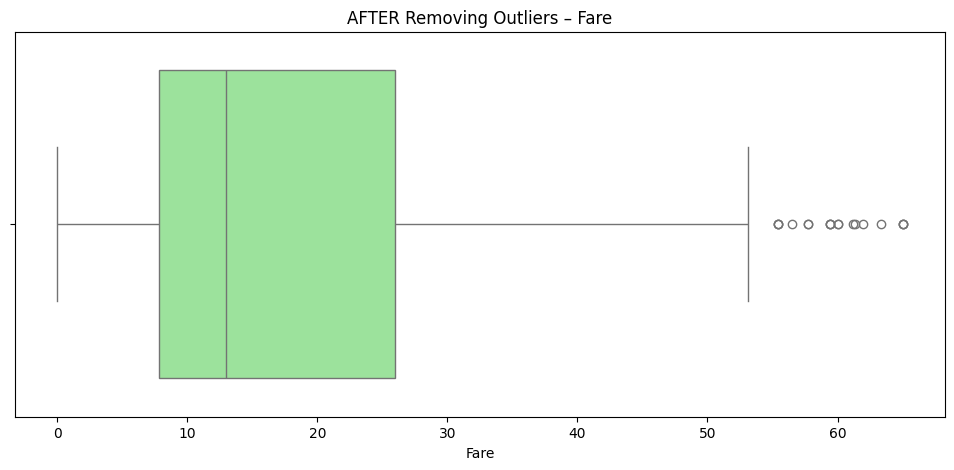

In [34]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[col], color='tomato')
    plt.title(f'BEFORE Removing Outliers – {col}')
    plt.show()

    cleaned_df = remove_outliers_iqr(df, col)

    plt.figure(figsize=(12, 5))
    sns.boxplot(x=cleaned_df[col], color='lightgreen')
    plt.title(f'AFTER Removing Outliers – {col}')
    plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       418 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      418 non-null    float64
 9   Cabin     418 non-null    object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [36]:
df.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [37]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [38]:
df['Sex']=df['Sex'].map({'male': 0  , 'female' : 1})

In [39]:
df['Embarked']=df['Embarked'].map({'Q': 0  , 'S' : 1 , 'C' : 2})

In [40]:
df.drop('Cabin',axis=1,inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

X = df.drop('Survived',axis=1)
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=10)

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate
accuracy = model.score(X_test, y_test)
print(f"Accuracy with Feature Engineering + PCA: {accuracy:.2f}")

Accuracy with Feature Engineering + PCA: 0.96


In [43]:
from  sklearn.model_selection  import  cross_val_score

scores = cross_val_score(model,X_test, y_test,cv=10)
# Print results
print("Cross-Validation Scores:", scores)
print("Average Accuracy: {:.2f}%".format(scores.mean() * 100))

Cross-Validation Scores: [0.88888889 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Average Accuracy: 98.89%


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Create the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Step 2: Train the model on training data
classifier.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = classifier.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.95

Confusion Matrix:
[[44  1]
 [ 3 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.97      0.92      0.95        39

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84

